In [ ]:
#https://www.kaggle.com/datasets/amitvkulkarni/impact-of-product-positioning-on-sales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Product Positioning.csv')
df.head()


Saving Product Positioning.csv to Product Positioning (1).csv


,Product ID,Product Position,Price,Competitor's Price,Promotion,Foot Traffic,Consumer Demographics,Product Category,Seasonal,Sales Volume
0,185102,Aisle,17.07,16.16,No,Medium,Families,Clothing,No,2823
1,188771,Aisle,17.41,13.13,No,Low,Seniors,Clothing,No,654
2,180176,End-cap,43.16,38.37,Yes,Medium,Young adults,Electronics,Yes,2220
3,112917,Aisle,42.26,38.98,Yes,Low,Families,Clothing,Yes,1568
4,192936,End-cap,47.94,45.59,No,Medium,College students,Clothing,Yes,2942


In [ ]:
# Convert relevant columns to numeric
numeric_cols = ['Price', "Competitor's Price", 'Sales Volume', 'Foot Traffic']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop nulls and duplicates
df.drop_duplicates(inplace=True)
df.dropna(subset=['Sales Volume', 'Price', 'Product Position'], inplace=True)


In [ ]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.describe(include='all')


Shape: (1000, 10)
Columns: ['Product ID', 'Product Position', 'Price', "Competitor's Price", 'Promotion', 'Foot Traffic', 'Consumer Demographics', 'Product Category', 'Seasonal', 'Sales Volume']


,Product ID,Product Position,Price,Competitor's Price,Promotion,Foot Traffic,Consumer Demographics,Product Category,Seasonal,Sales Volume
count,1000.000000,1000,1000.000000,1000.000000,1000,0.0,1000,1000,1000,1000.000000
unique,NaN,3,NaN,NaN,2,NaN,4,3,2,NaN
top,NaN,End-cap,NaN,NaN,No,NaN,Families,Clothing,Yes,NaN
freq,NaN,342,NaN,NaN,528,NaN,263,338,505,NaN
mean,154899.862000,NaN,28.020010,25.550110,NaN,NaN,NaN,NaN,NaN,1769.311000
std,25795.563607,NaN,13.067876,13.156466,NaN,NaN,NaN,NaN,NaN,718.386603
min,110033.000000,NaN,5.060000,0.720000,NaN,NaN,NaN,NaN,NaN,507.000000
25%,133164.500000,NaN,16.917500,14.277500,NaN,NaN,NaN,NaN,NaN,1136.500000
50%,154694.500000,NaN,28.680000,26.145000,NaN,NaN,NaN,NaN,NaN,1791.500000
75%,176954.250000,NaN,39.332500,37.125000,NaN,NaN,NaN,NaN,NaN,2363.750000


In [ ]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 Product ID                  0
Product Position            0
Price                       0
Competitor's Price          0
Promotion                   0
Foot Traffic             1000
Consumer Demographics       0
Product Category            0
Seasonal                    0
Sales Volume                0
dtype: int64


In [ ]:
print("Unique Positions:", df['Product Position'].nunique())
print("Top Product Positions:\n", df['Product Position'].value_counts().head())


Unique Positions: 3
Top Product Positions:
 Product Position
End-cap           342
Aisle             340
Front of Store    318
Name: count, dtype: int64


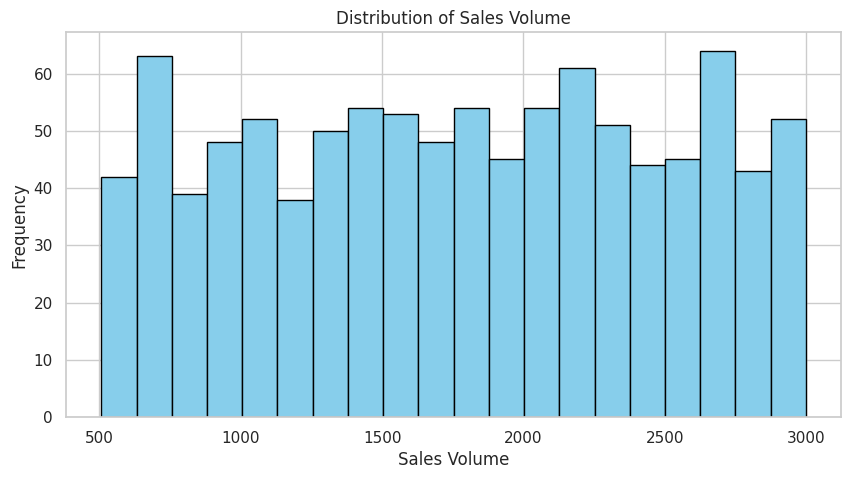

In [ ]:
plt.hist(df['Sales Volume'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Sales Volume")
plt.xlabel("Sales Volume")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-2109410318.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='Product Position', y='Sales Volume', palette='viridis')


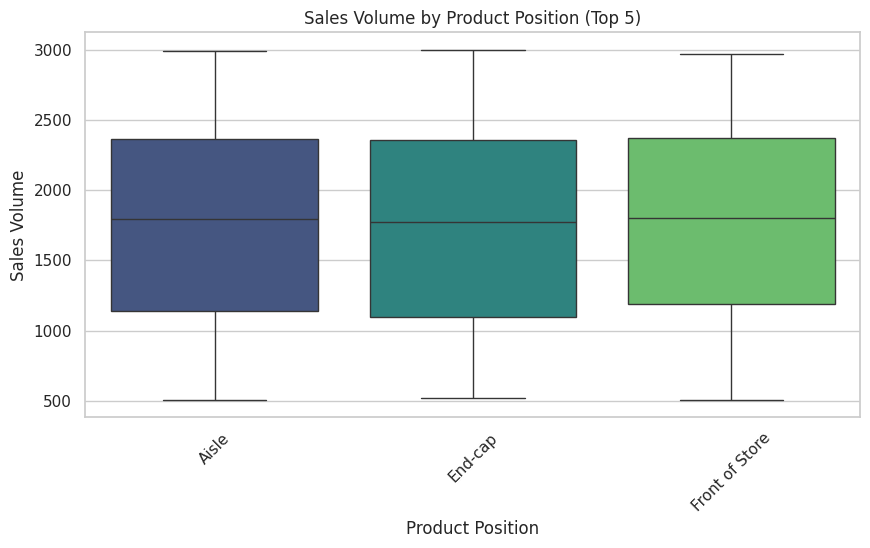

In [ ]:
top_positions = df['Product Position'].value_counts().head(5).index
subset = df[df['Product Position'].isin(top_positions)]

sns.boxplot(data=subset, x='Product Position', y='Sales Volume', palette='viridis')
plt.title("Sales Volume by Product Position (Top 5)")
plt.xlabel("Product Position")
plt.ylabel("Sales Volume")
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.groupby('Product Position')['Sales Volume'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False).head()


,mean,median,count
Product Position,,,
Aisle,1780.794118,1793.5,340
Front of Store,1773.345912,1799.0,318
End-cap,1754.143275,1771.0,342


In [ ]:
df[['Price', 'Sales Volume']].dropna().describe()


,Price,Sales Volume
count,1000.000000,1000.000000
mean,28.020010,1769.311000
std,13.067876,718.386603
min,5.060000,507.000000
25%,16.917500,1136.500000
50%,28.680000,1791.500000
75%,39.332500,2363.750000
max,49.980000,2999.000000


In [ ]:
df['Promotion'] = df['Promotion'].astype(str)

promo_comparison = df.groupby('Promotion')['Sales Volume'].agg(['mean', 'median', 'count']).rename(columns={
    'mean': 'Avg Sales',
    'median': 'Median Sales',
    'count': 'No. of Products'
})

promo_comparison


,Avg Sales,Median Sales,No. of Products
Promotion,,,
No,1761.225379,1776.5,528
Yes,1778.355932,1798.5,472


In [ ]:
df['Seasonal'] = df['Seasonal'].astype(str)

seasonal_sales = df.groupby('Seasonal')['Sales Volume'].agg(['mean', 'count']).rename(columns={
    'mean': 'Avg Sales',
    'count': 'Product Count'
})

seasonal_sales


,Avg Sales,Product Count
Seasonal,,
No,1749.313131,495
Yes,1788.912871,505


In [ ]:
df["Price Difference"] = df["Price"] - df["Competitor's Price"]
df[["Price", "Competitor's Price", "Price Difference"]].describe()


,Price,Competitor's Price,Price Difference
count,1000.000000,1000.000000,1000.000000
mean,28.020010,25.550110,2.469900
std,13.067876,13.156466,1.450645
min,5.060000,0.720000,0.000000
25%,16.917500,14.277500,1.160000
50%,28.680000,26.145000,2.515000
75%,39.332500,37.125000,3.710000
max,49.980000,49.850000,4.990000


In [ ]:
df[['Product ID', 'Sales Volume']].sort_values(by='Sales Volume', ascending=False).head(10)


,Product ID,Sales Volume
422,179528,2999
928,167648,2990
125,183825,2989
942,135786,2987
237,123047,2985
754,117812,2984
445,138820,2975
246,113435,2973
423,152881,2971
427,113169,2971
